## 머신러닝 실습

### 머신러닝 개요

- AI(Artificial Intelligence) > ML(Machine Learning) > DL(Depp Learning) -> AI가 가장 포괄적인 의미

#### 인공지능 개발 파이썬 프레임워크

- NumPy,SciPy
- Pandas
- Matplotlib
- Ploty -> Matplotlib 대체할 수 있는 라이브러리(Dash)
- Scikit-learn 0 > sklearn이라고도 부른다. 고전적인 머신러닝 라이브러리(장점 : 쉬움)
- Theano -> 머신러닝용 라이브러리
- Tensorflow -> 머신러닝/딥러닝 라이브러리 점유율 1위
- Keras -> 점유율 3위. 딥러닝을 위해서 독립 개발. Tensorflow 2.0이 Keras를 병합
- PyTorch -> 점유율 2위. 제일 핫한 딥러닝 라이브러리. Facebook, YOLO 이미지, 객체인식 프레임워크랑 병합

##### Scikit-learn으로 머신러닝
- 일반 프로그램 : 입력값 x로 출력값 y 도출
- 머신러닝 : 입력값 x를 넣고 y도 넣어서 학습 모델을 생성 -> 새로운 x를 학습 모델에 넣으면 새로운 y를 도출
- 지도 학습 대부분의 머신러닝은 개발자(인간)가 어떤 결과를 나온다는 것을 지도해줌

##### 분석평가지표
- 절대값 평균오차 : MAE, mean_absolute_error() 함수 사용
- 제곱 평균오차 : MSE,mean_square_error() 함수 사용
- 제곱 평균의 제곱근 오차 : RMSE, Scikit-learn에 없음
- 분산비율 : Variance score, r2_score() 사용


### 보스턴 집값 가격 예측

#### 데이터 수집

##### Scikit-Learn 라이브러리 내 데이터


In [ ]:
# scikit-learn 설치
#pip install sklearn은 더 이상 사용 불가
!pip install scikit-learn

In [93]:
# 필수 라이브러리 사용등록
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import sklearn

In [ ]:
# scikit-learn 1.2버전 이상에서는 load_boston이 사라짐

In [50]:
# 보스턴 집값 데이터 다운로드
X,y = datasets.fetch_openml('boston',return_X_y=True)

g:\DEV\Python312\Lib\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [33]:
X['MEDV'] = y

In [35]:
df_boston_housing = X

In [36]:
df_boston_housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [39]:
df_boston_housing = pd.read_excel('./data/BostonHousing.xlsx')

In [175]:
df_boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


##### 각 컬럼 설명
|CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|
|---|---|---|---|---|---|---|
|범죄발생률|25,000평방피트 초과 거주 비율|비상업지역 넓이 비율|찰스강 더미변수(1:강경계,0:비경계)|일산화질소농도|거주가능방수|1940이전 건축 주택 비율|
|**DIS**|**RAD**|**TAX**|**PTRATIO**|**B**|**LSTAT**|**MEDV**|
|5개 주요고동센터까지 가중거리|고속도로접근용이도|10,000달러당 재산세 비율|지역 교사와 학생수 비율|흑인거주비율|하위계층비율|가격(본인소유주택가격 중앙값)|

##### 분석모델 구축, 결과 분석
- 전체 데이터(100)에서 보통 70~80%의 데이터를 훈련(train) 시 사용하고 나머지 20~30% 데이터를 검증(test)에 사용한다

In [41]:
## 회귀분석 모델, 함수 사용등록
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [45]:
# X(독립변수 13가지 속성들) , y(종속변수, 독립변수의 영항 받은 값)

In [47]:
# 통합 데이터에서 독립변수만 다시 분리하기
df_boston_housing.drop(['MEDV'],axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [94]:
sklearn.__version__

'1.4.1.post1'

In [151]:
# 훈련용 데이터와 평가(검증)용 데이터 분할
# 판다스 DF에서 손서대로 데이터를 분할할 경우 특정 지표의 데이터가 특정 부분에 집중되어 있을 가능성이 있다. -> 학습이 제대로 이루어지지 않을 가능성이 있다 -> 따라서 train_test_split을 사용한다.

# test_size는 비율 0.3 30%
# random_state = 156 -> MSE 17.297
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=190)

In [64]:
lr = LinearRegression()

In [152]:
lr.fit(X_train,y_train)

LinearRegression()

In [153]:
# 선형회귀 분석 : 검증(평가) 데이터를 넣어서 예측 수행
y_predict = lr.predict(np.array(X_test))

g:\DEV\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [146]:
# 검증 데이터의 실제 가격값
y_test.head()

355    20.6
378    13.1
338    20.6
23     14.5
8      16.5
Name: MEDV, dtype: float64

In [ ]:
# 선형 회귀 모델로 예측한 값
y_predict

In [154]:
## 제곱 평균 오차로 평가
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse) # NumPy에 있는 squareroot 함수 사용하면 변환 가능
r2 = r2_score(y_test,y_predict)

print(f'MSE  = {mse:.3f}') # 거의 오차가 없음
print(f'RMSE = {rmse}')
print(f'R^2(Variance score) ={r2}')

MSE  = 14.561
RMSE = 3.8159350984751943
R^2(Variance score) =0.6971917081507


In [161]:
## Y절편값, 회귀계수값
print(f'Y절편값 = {lr.intercept_}')
print(f'회귀계수값= {np.round(lr.coef_,1)}')

Y절편값 = 38.49049161993649
회귀계수값= [ -0.1   0.    0.    3.  -18.    3.6   0.   -1.6   0.3  -0.   -0.9   0.
  -0.6]


In [162]:
pd.Series(data=np.round(lr.coef_,2), index=X.columns)

CRIM       -0.10
ZN          0.05
INDUS       0.02
CHAS        3.02
NOX       -18.04
RM          3.61
AGE         0.00
DIS        -1.55
RAD         0.29
TAX        -0.01
PTRATIO    -0.94
B           0.01
LSTAT      -0.58
dtype: float64

#### 회귀계수, 절편이 필요한 이유
- 선형회귀 방정식(회귀식) 도출

$$Y_{MEDV} = -0.11X_{CRIM} + 0.05X_{ZN} + 0.02X_{INDUS} + 3.02X_{CHAS} + (-18.04)X_{NOX} + 3.61X_{RM} + 0.00X_{AGE} + (-1.55)X_{DIS} + \\0.29X_{RAD} + (-0.01)X_{TAX} + (-0.94)X_{PTRATIO} + 0.01X_{B} + (-0.57)X_{LSTAT} + 38.490491$$

##### 각각의 독립변수와 종속변수 MEDV 간의 상관관계 산점도

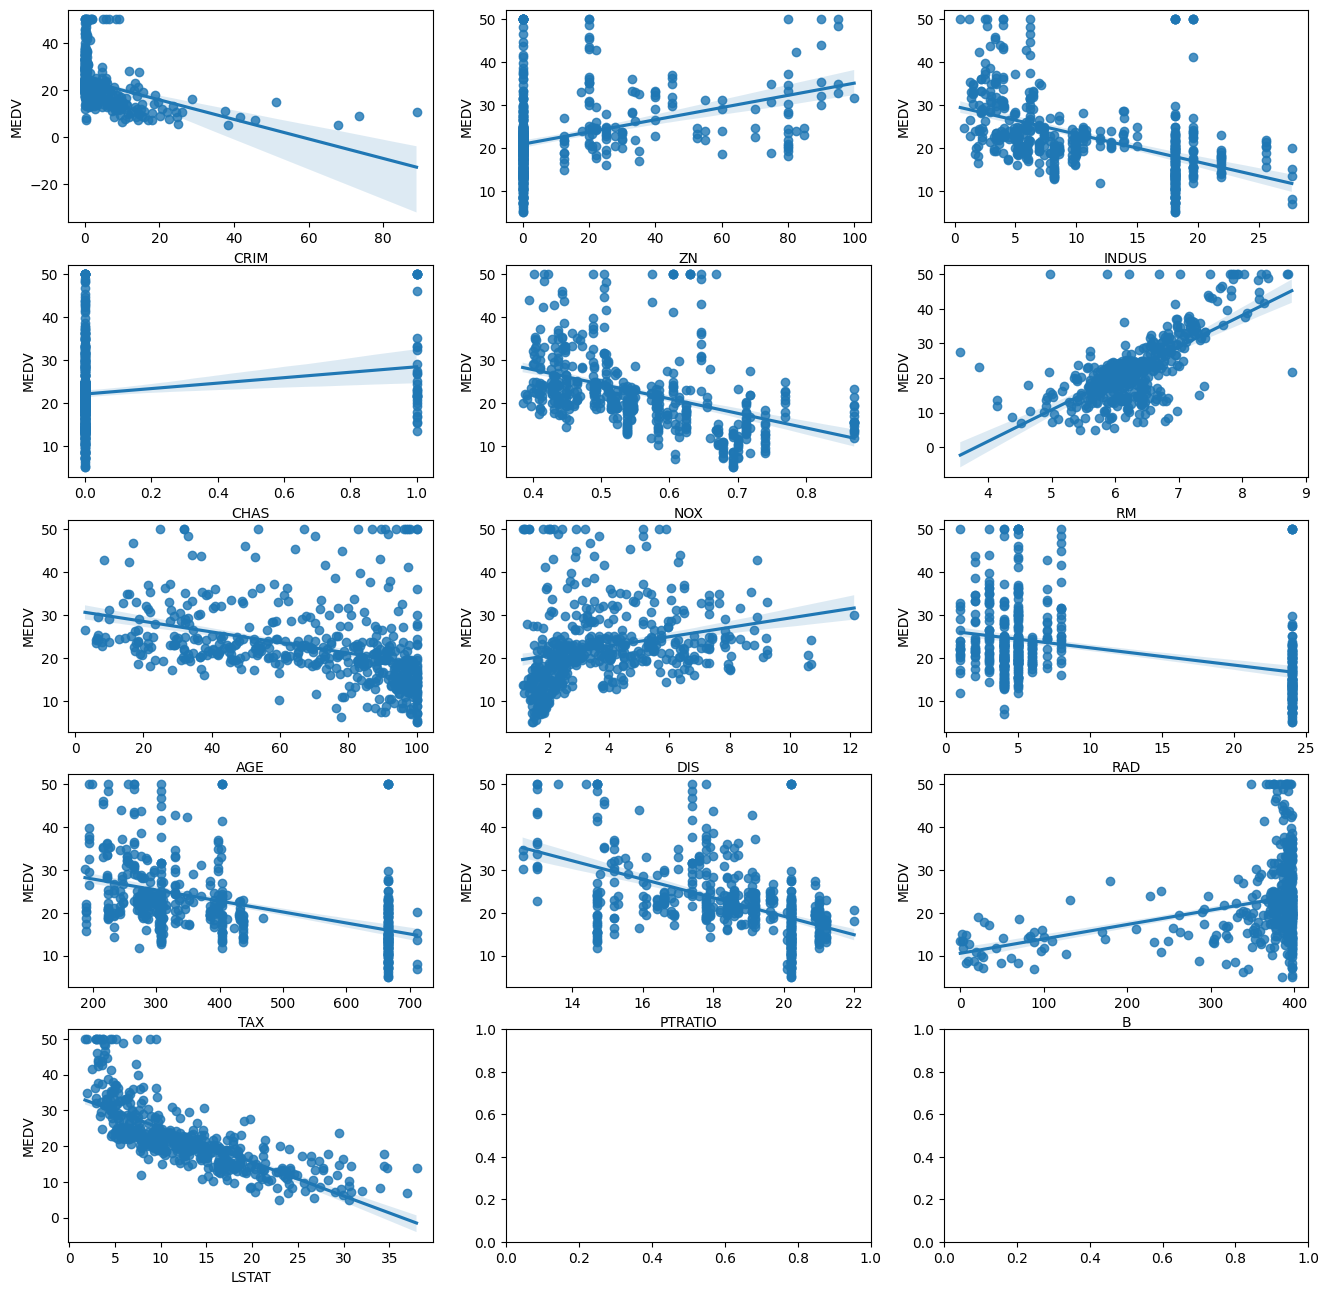

In [173]:
# 한글은 사용하지 않기로 한다.
fig,axs = plt.subplots(figsize=(16,16),ncols=3,nrows=5)
# dType이 Category면 산점도를 그릴 수 없으므로, astype()을 int32로 바꾸어 실행
x_features = list(X.columns)

for i, feat in enumerate(x_features): # 13개 독립 변수 이름으로 반복하면서
    row = i// 3
    col = i % 3
    sns.regplot(data=df_boston_housing,x=feat,y="MEDV",ax=axs[row][col])


plt.show()

##### 결론
- 13가지의 독립 변수 중 가격과 크게 연관이 있는 것(상관 관계가 높은 것)
    - RM : 방의 개수가 많으면 그 지역의 집값은 높다..
    - LSTAT : 하위 계층이 많은 살고 있다면 그 지역의 집값은 낮다.